# 📢 File explanation!!

Pada tahap ini, saya akan fokus melakukan Exploratory Data Analysis (EDA) terhadap data tanpa melakukan preprocessing terlebih dahulu. Preprocessing data akan dilakukan pada file selanjutnya.

# 🎯 **Step 0: Import library**
---

In [ ]:
!pip -q install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract

from urllib.parse import urlparse
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
plt.style.use('seaborn-v0_8')

In [ ]:
matplotlib.__version__

'3.7.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 🎯 **Step 1: Load dataset**
---

In [ ]:
df_url = pd.read_csv('/content/drive/MyDrive/TUGAS AKHIR/Notebook/Dataset/URL/new_url.csv')

df_url.head()

,URL,Category
0,https://ats-cool-site.webflow.io/,phishing
1,https://docs.google.com/presentation/d/e/2PACX...,phishing
2,https://docs.google.com/presentation/d/e/2PACX...,phishing
3,https://m8vqz27f.square.site/,phishing
4,https://docs.google.com/presentation/d/e/2PACX...,phishing


# 🎯 **Step 2: Check data info**
---

In [ ]:
df_url.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   URL       100000 non-null  object
 1   Category  100000 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


# 🎯 **Step 3: Check duplicate data**
---

In [ ]:
duplicate = df_url.duplicated().sum()

duplicate

0

🚧 Berdasarkan informasi di atas tidak terdapat data terduplikasi

# 🎯 **Step 4: Check null values**
---

<Axes: >

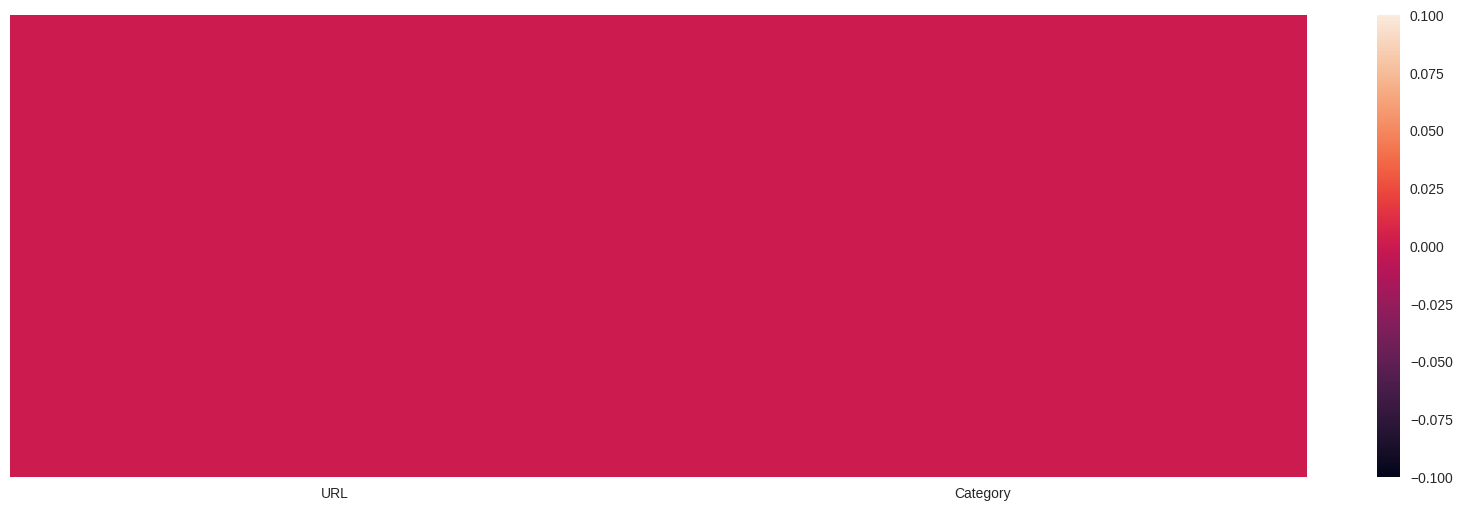

In [ ]:
plt.figure(figsize=(18, 6))

sns.heatmap(df_url.isnull(), yticklabels=False, cbar=True, cbar_kws={'fraction': 0.02})

In [ ]:
def detect_null_values(data):
    null_column = data.columns[data.isnull().any()]

    head_column = ["Column name", "Total nulls", "Total nulls (%)", "Data type"]

    null_info = pd.DataFrame(columns=head_column)

    for column in null_column:

        total_null = data[column].isnull().sum()

        total_null_percent = (total_null / len(data)) * 100

        data_type = data[column].dtype

        null_info = pd.concat([null_info, pd.DataFrame([[column, total_null, total_null_percent, data_type]], columns=head_column)],  ignore_index=True)

    return null_info

null_info = detect_null_values(df_url)

null_info

,Column name,Total nulls,Total nulls (%),Data type


🚧 Berdasarkan informasi di atas dapat diketahui bahwasanya tidak terdapat null values.

# 🎯 **Step 5: Compare the distribution of the "Category" column.**

---



In [ ]:
url_counts = df_url['Category'].value_counts(ascending=True)

url_counts

Category
phishing        50000
non-phishing    50000
Name: count, dtype: int64

<ipython-input-12-6e09ab02d5d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')


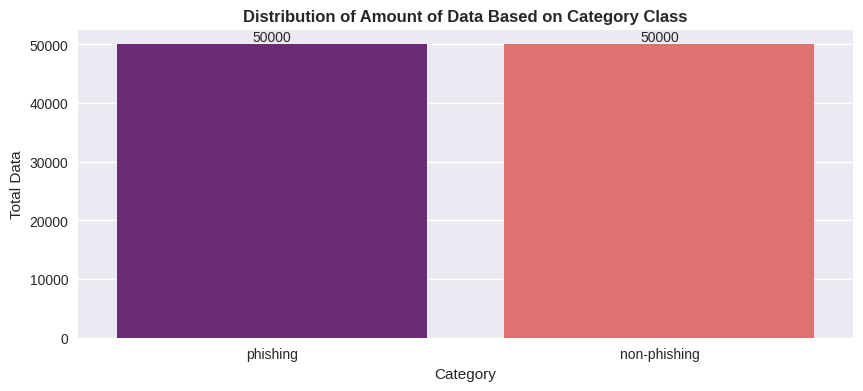

In [ ]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='magma')

for p in ax.containers:
  ax.bar_label(p,)

plt.xlabel('Category')

plt.ylabel('Total Data')

plt.title('Distribution of Amount of Data Based on Category Class', fontweight="bold")

plt.show()

🚧 Berdasarkan grafik di atas dapat diketahui bahwa sebaran data seimbang sehingga tidak perlu dilakukan balancing data

# 🎯 **Step 6: Check URL length**

---

In [ ]:
df_url['url_length'] = df_url['URL'].apply(len)

## ✨ 6.1 - Barplot

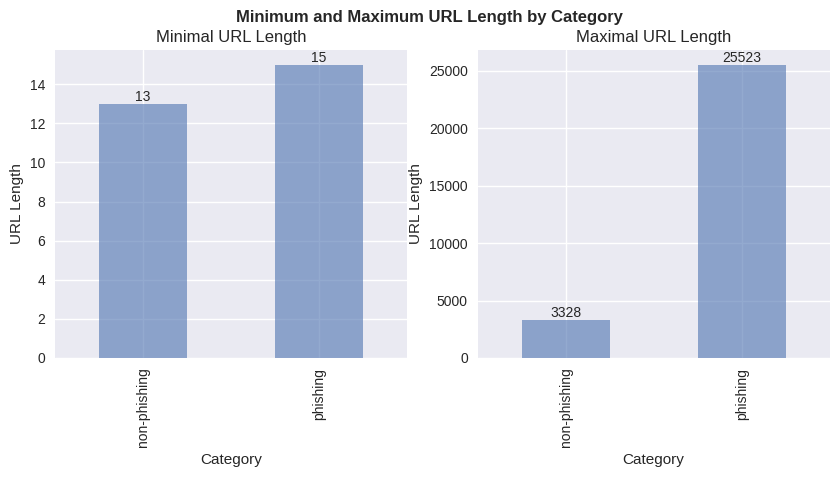

In [ ]:
def plot_text_length(df, column, label):

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    fig.suptitle('Minimum and Maximum URL Length by Category', fontweight="bold")

    df.groupby(label)[column].min().plot(kind='bar', ax=axes[0], alpha=0.6)
    axes[0].set_title('Minimal URL Length')
    axes[0].set_ylabel('URL Length')
    for p in axes[0].containers:
        axes[0].bar_label(p,)

    df.groupby(label)[column].max().plot(kind='bar', ax=axes[1], alpha=0.6)
    axes[1].set_title('Maximal URL Length')
    axes[1].set_ylabel('URL Length')
    for p in axes[1].containers:
        axes[1].bar_label(p,)

    plt.show()

plot_text_length(df_url, 'url_length', 'Category')

🚧 Berdasarkan grafik di atas dapat diketahui sebagai berikut:
- Panjang minimal url untuk kategori Phishing ialah sekitar 7 dan maksimal panjangnya sekitar 25523
- Panjang minimal url untuk kategori Non-Phishing ialah sekitar 8 dan maksimal panjangnya sekitar 6409

Kategori yang mempunyai panjang url terpendek dan terpanjang ialah Phishing.

## ✨ 6.2 - Boxplot

<ipython-input-15-35838f98170b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Category', y='url_length', data=df_url, palette='rocket', whis=3.0)


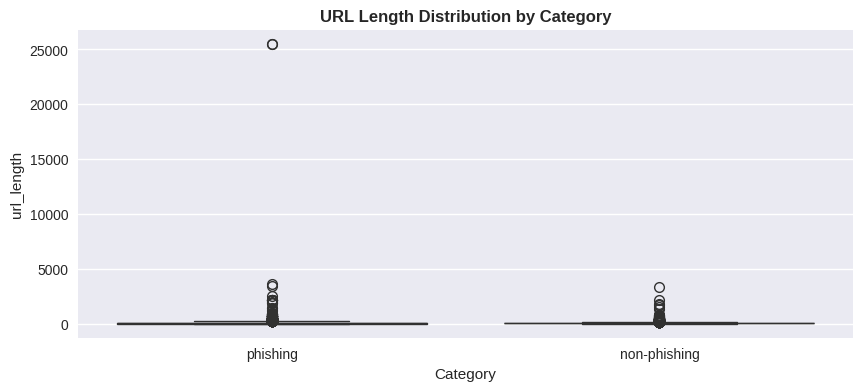

In [ ]:
plt.figure(figsize=(10, 4))

ax = sns.boxplot(x='Category', y='url_length', data=df_url, palette='rocket', whis=3.0)

plt.title('URL Length Distribution by Category', fontweight="bold")

plt.show()

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya mayoritas panjang url ialah melebih Q3 dari data baik URL Phishing maupun Non-phishing. Kemudian hanya ada 1 data yang panjang URL nya berbeda sendiri, yaitu di kategori Phishing.

In [ ]:
df_url.groupby('Category')['url_length'].mean()

Category
non-phishing    60.07410
phishing        67.87864
Name: url_length, dtype: float64

🚧 Kemudian rata-rata panjang URL untuk kategori Phishing sekitar 68 dan untuk Non-phishing sekitar 59.

# 🎯 **Step 7: Check the words unigram, bigram, trigrams that often appear**

---


🔎 Pada tahap ini saya menggunakan perpustakaan `CountVectorizer` dari Sklearn untuk menghitung frekuensi kemunculan kata dari unigram, bigram, dan trigram. Lalu saya filter untuk menampilkan 10 kata teratas yang paling banyak kemunculannya

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):

    vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range)

    X = vectorizer.fit_transform(corpus)

    words = vectorizer.get_feature_names_out()

    freqs = X.sum(axis=0).A1

    df = pd.DataFrame({'Data': words, 'Frequency': freqs})

    df = df.sort_values(by='Frequency', ascending=False).head(n).reset_index(drop=True)

    return df

def plot_to_graph(plot_data):

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # axes[1, 1].axis('off')

    for i, plot_info in enumerate(plot_data):

        ax = axes[i]

        sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)

        for p in ax.patches:
            ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + 0.5), ha='right', va='center', color='white')

        ax.set_title(plot_info['title'], fontweight="bold")

    plt.tight_layout()

    plt.show()

In [ ]:
df_phishing = df_url[df_url['Category'] == 'phishing']

df_nonphishing = df_url[df_url['Category'] == 'non-phishing']

## ✨ 7.1 - Unigram

In [ ]:
stop_words = None

n = 10

unigram_phishing = get_top_ngrams(df_phishing['URL'], (1, 1), stop_words, n)

unigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (1, 1), stop_words, n)

unigram_phishing.head()


,Data,Frequency
0,https,45594
1,com,27933
2,ipfs,22450
3,amp,7658
4,dev,6753


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


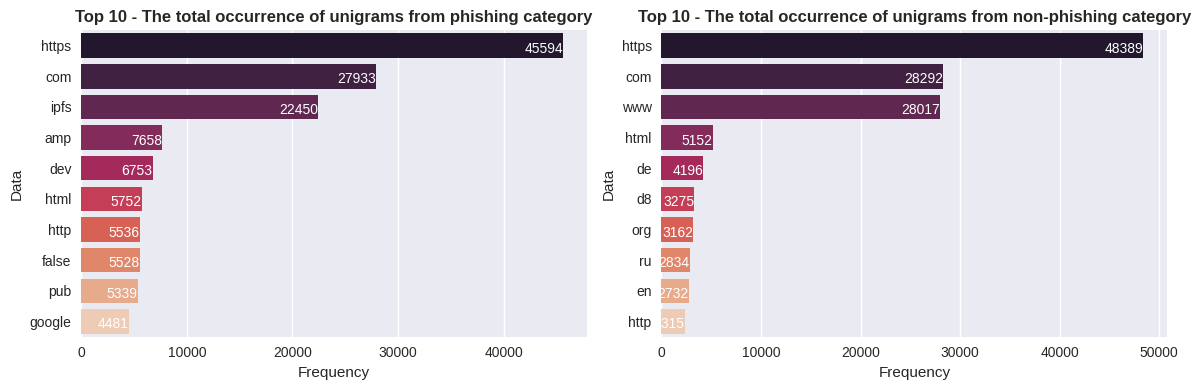

In [ ]:
plot_data = [

    {'data': unigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': unigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya unigram 'https' dan 'com' masing-masing berada di posisi 2 teratas untuk setiap kategori. Dalam hal ini berarti URL Phishing mulai menggunakan unigram yang sama dengan URL Non-phishing walaupun jumlahnya berbeda. Kemudian dapat diperhatikan pada unigram kategori Phishing, terdapat hal menarik karena pada URL Phishing masih terdapat unigram 'php' dan 'html' yang mengindikasikan nama file.

## ✨ 7.2 - Bigram

In [ ]:
stop_words = None

n = 10

bigram_phishing = get_top_ngrams(df_phishing['URL'], (2, 2), stop_words, n)

bigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (2, 2), stop_words, n)

bigram_phishing.head()


,Data,Frequency
0,ipfs com,7495
1,com ipfs,4510
2,google com,4437
3,cf ipfs,4345
4,false amp,3918


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


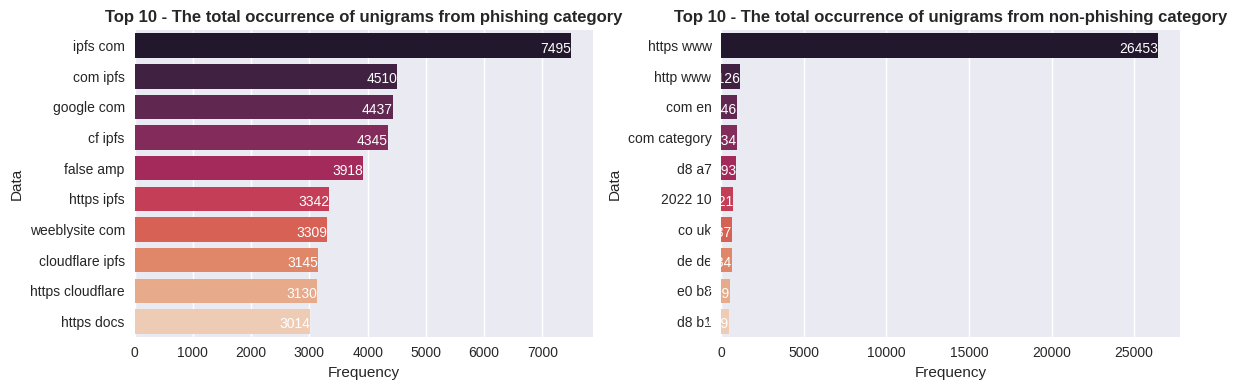

In [ ]:
plot_data = [

    {'data': bigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': bigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya bigram kategori Phishing, terdapat informasi menarik bahwasanya URL Phishing masih memiliki nama file (sperti index.php atau index.html) pada struktur URL-nya dan menggunakan jasa hosting gratis.

## ✨ 7.3 - Trigram

In [ ]:
stop_words = None

n = 10

trigram_phishing = get_top_ngrams(df_phishing['URL'], (3, 3), stop_words, n)

trigram_nonphishing = get_top_ngrams(df_nonphishing['URL'], (3, 3), stop_words, n)

trigram_phishing.head()


,Data,Frequency
0,ipfs com ipfs,4491
1,cf ipfs com,4345
2,cloudflare ipfs com,3145
3,https cloudflare ipfs,3127
4,docs google com,3012


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


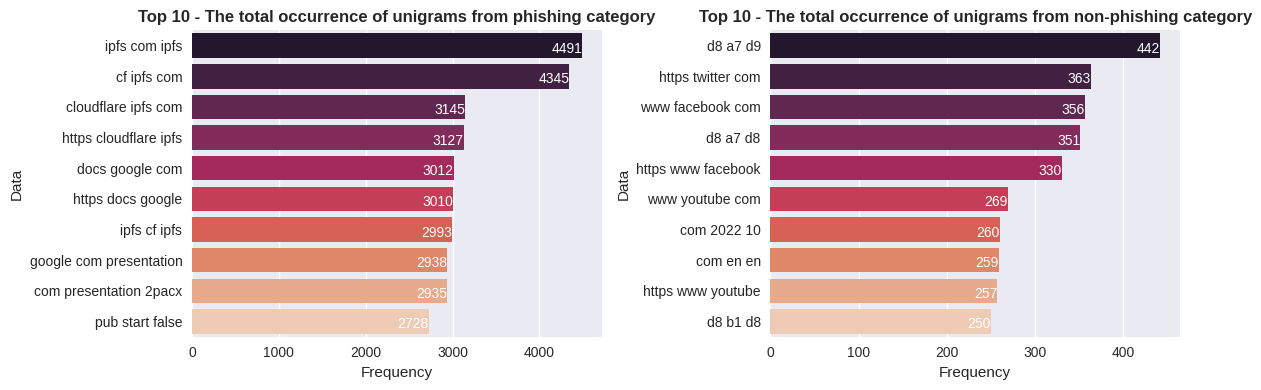

In [ ]:
plot_data = [

    {'data': trigram_phishing, 'title': 'Top 10 - The total occurrence of unigrams from phishing category'},

    {'data': trigram_nonphishing, 'title': 'Top 10 - The total occurrence of unigrams from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya URL kategori Phishing, struktur URL-nya aneh seperti tidak beraturan. Sedangkan pada URL Non-phishing mayoritas URL-nya tidak aneh seperti URL Phishing.

# 🎯 **Step 7: Extraction of sub domains, domains and top level domains**

---


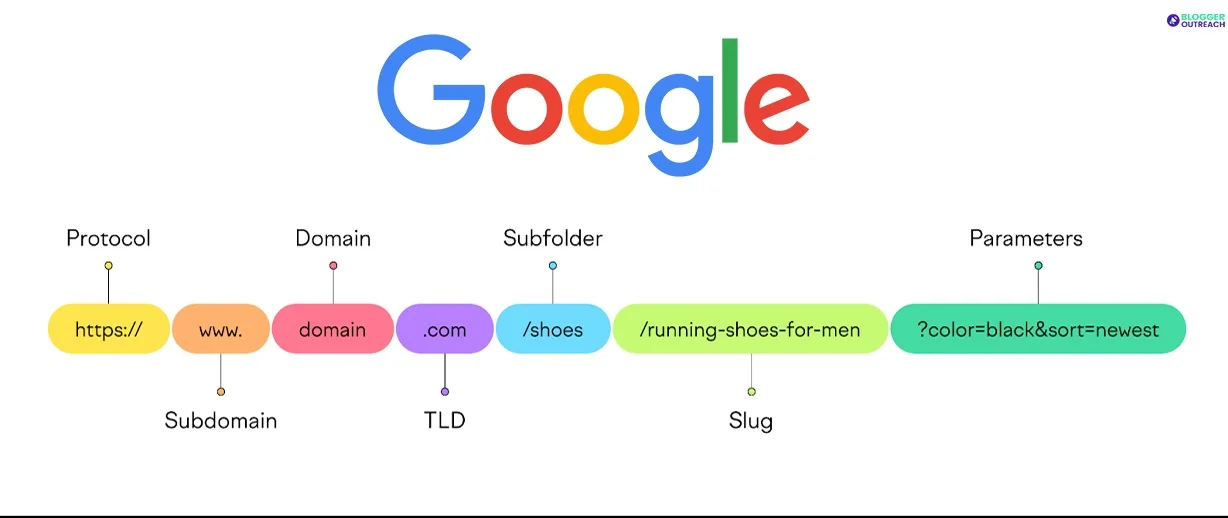

🔎 Saya melakukan ekstraksi subdomain, domain, dan TLD untuk mengetahui distribusi masing-masing dari ketiga tersebut mana yang paling digunakan untuk phishing.

In [ ]:
tld_info = df_url['URL'].apply(lambda x: tldextract.extract(x))

df_url['sub_domain'] = tld_info.apply(lambda x: x.subdomain)
df_url['domain'] = tld_info.apply(lambda x: x.domain)
df_url['tld'] = tld_info.apply(lambda x: x.suffix)

df_url.head()

,URL,Category,url_length,sub_domain,domain,tld
0,https://ats-cool-site.webflow.io/,phishing,33,ats-cool-site,webflow,io
1,https://docs.google.com/presentation/d/e/2PACX...,phishing,175,docs,google,com
2,https://docs.google.com/presentation/d/e/2PACX...,phishing,175,docs,google,com
3,https://m8vqz27f.square.site/,phishing,29,m8vqz27f,square,site
4,https://docs.google.com/presentation/d/e/2PACX...,phishing,175,docs,google,com


In [ ]:
df_phishing = df_url[df_url['Category'] == 'phishing']

df_nonphishing = df_url[df_url['Category'] == 'non-phishing']

## ✨ 7.1 - Distribution top level domain

In [ ]:
tld_counts_phishing = df_phishing['tld'].value_counts().reset_index()
tld_counts_nonphishing = df_nonphishing['tld'].value_counts().reset_index()

tld_counts_phishing.head()

,tld,count
0,com,25900
1,dev,6703
2,network,2188
3,app,1854
4,io,1705


In [ ]:
tld_counts_phishing.rename(columns={'tld': 'Data', 'count': 'Frequency'}, inplace=True)
tld_counts_nonphishing.rename(columns={'tld': 'Data', 'count': 'Frequency'}, inplace=True)

tld_counts_phishing.head()

,Data,Frequency
0,com,25900
1,dev,6703
2,network,2188
3,app,1854
4,io,1705


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


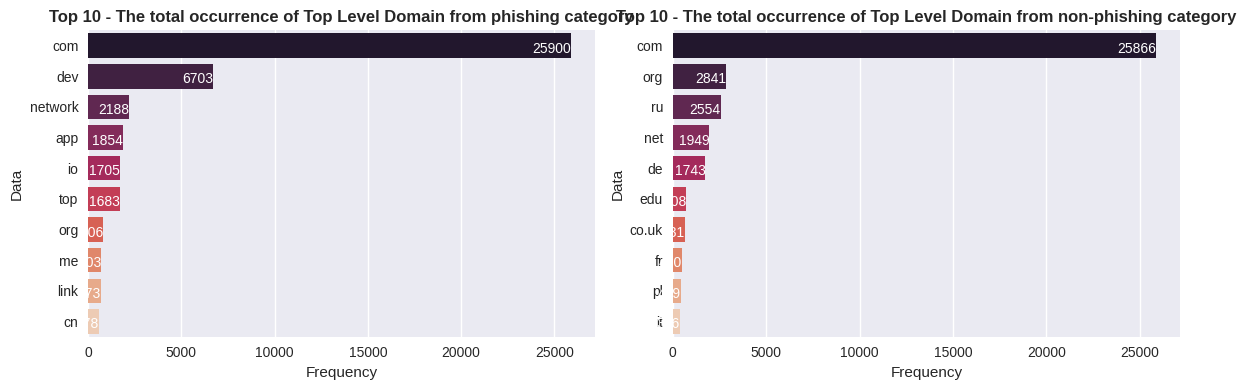

In [ ]:
plot_data = [

    {'data': tld_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from phishing category'},

    {'data': tld_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Top Level Domain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasarkan grafik di atas dapat dilihat bahwasanya posisi pertama ditempati oleh top level domain 'com'. Akan tetapi hal ini tidak bisa menjadi dasar informasi untuk mengklasifikasikan suatu url Phishing atau tidak. Akan tetapi ada hal yang menarik pada kategori Phishing, penyerang ternyata rela menggelontorkan uang untuk memakai TLD .com

## ✨ 7.2 - Distribution domain

In [ ]:
domain_counts_phishing = df_phishing['domain'].value_counts().reset_index()
domain_counts_nonphishing = df_nonphishing['domain'].value_counts().reset_index()

domain_counts_phishing.head()

,domain,count
0,cf-ipfs,4342
1,google,3645
2,weeblysite,3309
3,cloudflare-ipfs,3141
4,pages,2426


In [ ]:
domain_counts_phishing.rename(columns={'domain': 'Data', 'count': 'Frequency'}, inplace=True)
domain_counts_nonphishing.rename(columns={'domain': 'Data', 'count': 'Frequency'}, inplace=True)

domain_counts_phishing.head()

,Data,Frequency
0,cf-ipfs,4342
1,google,3645
2,weeblysite,3309
3,cloudflare-ipfs,3141
4,pages,2426


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


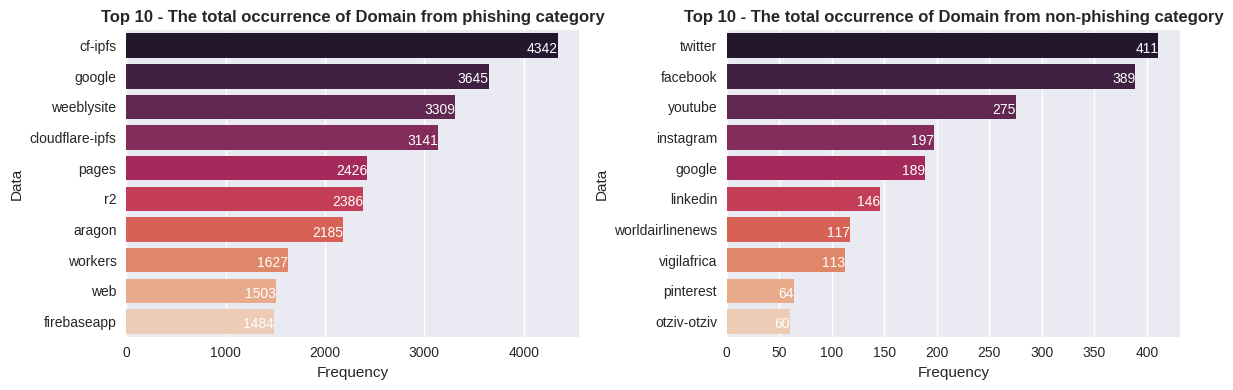

In [ ]:
plot_data = [

    {'data': domain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from phishing category'},

    {'data': domain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of Domain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Mmm, sungguh menarik bahwasanya orang yang membuat link Phishing menggunakan domain yang gratis dan tidak bermodal.

## ✨ 7.3 - Distribution subdomain

In [ ]:
subdomain_counts_phishing = df_phishing['sub_domain'].value_counts().reset_index()
subdomain_counts_nonphishing = df_nonphishing['sub_domain'].value_counts().reset_index()

subdomain_counts_phishing.head()

,sub_domain,count
0,,13381
1,docs,3011
2,ipfs.eth,2185
3,www,1277
4,new.express,927


In [ ]:
subdomain_counts_phishing.rename(columns={'sub_domain': 'Data', 'count': 'Frequency'}, inplace=True)
subdomain_counts_nonphishing.rename(columns={'sub_domain': 'Data', 'count': 'Frequency'}, inplace=True)

subdomain_counts_phishing.head()

,Data,Frequency
0,,13381
1,docs,3011
2,ipfs.eth,2185
3,www,1277
4,new.express,927


<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)
<ipython-input-17-9436c91abedd>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_info['data'], x='Frequency', y='Data', palette='rocket', ax=ax)


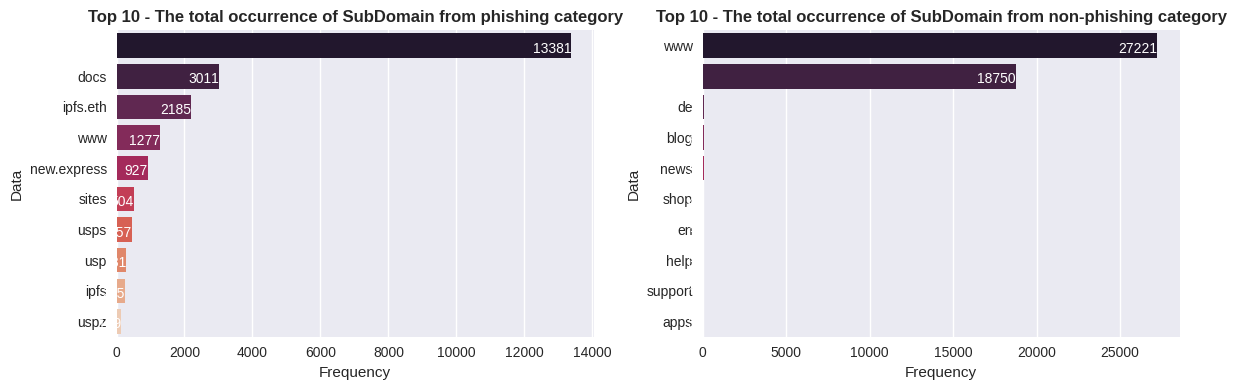

In [ ]:
plot_data = [

    {'data': subdomain_counts_phishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from phishing category'},

    {'data': subdomain_counts_nonphishing.head(10), 'title': 'Top 10 - The total occurrence of SubDomain from non-phishing category'},
]

plot_to_graph(plot_data)

🚧 Berdasar grafik di atas dapat diketahui bahwasanya mayoritas URL Phishing tidak memiliki subdomain pada struktur URLnya tetapi hal ini juga terjadi pada URL Non-phishing.

# 🎯 **Step 8: Count the number of protocols used**

---


## ✨ 8.1 - Protocols in Phishing

In [ ]:
# Menghitung skema URL
https_count = 0
http_count = 0
ftp_count = 0
other_count = 0

for url in df_phishing['URL']:
    parsed_url = urlparse(url)
    if parsed_url.scheme == 'https':
        https_count += 1
    elif parsed_url.scheme == 'http':
        http_count += 1
    elif parsed_url.scheme == 'ftp':
        ftp_count += 1
    else:
        other_count += 1

print("Jumlah URL dengan skema HTTPS:", https_count)
print("Jumlah URL dengan skema HTTP:", http_count)
print("Jumlah URL dengan skema FTP:", ftp_count)
print("Jumlah URL dengan skema lainnya:", other_count)

Jumlah URL dengan skema HTTPS: 44518
Jumlah URL dengan skema HTTP: 5482
Jumlah URL dengan skema FTP: 0
Jumlah URL dengan skema lainnya: 0


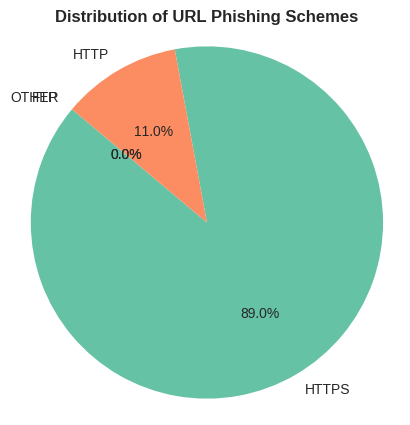

In [ ]:
labels = ['HTTPS', 'HTTP', 'FTP', 'OTHER']
sizes = [https_count, http_count, ftp_count, other_count]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.axis('equal')
plt.title('Distribution of URL Phishing Schemes', fontweight='bold')
plt.show()

## ✨ 8.2 - Protocols in Non-hishing

In [ ]:
# Menghitung skema URL
https_count = 0
http_count = 0
ftp_count = 0
other_count = 0

for url in df_nonphishing['URL']:
    parsed_url = urlparse(url)
    if parsed_url.scheme == 'https':
        https_count += 1
    elif parsed_url.scheme == 'http':
        http_count += 1
    elif parsed_url.scheme == 'ftp':
        ftp_count += 1
    else:
        other_count += 1

print("Jumlah URL dengan skema HTTPS:", https_count)
print("Jumlah URL dengan skema HTTP:", http_count)
print("Jumlah URL dengan skema FTP:", ftp_count)
print("Jumlah URL dengan skema lainnya:", other_count)

Jumlah URL dengan skema HTTPS: 47905
Jumlah URL dengan skema HTTP: 2095
Jumlah URL dengan skema FTP: 0
Jumlah URL dengan skema lainnya: 0


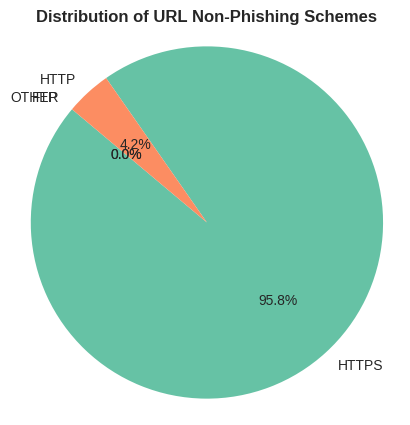

In [ ]:
labels = ['HTTPS', 'HTTP', 'FTP', 'OTHER']
sizes = [https_count, http_count, ftp_count, other_count]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.axis('equal')
plt.title('Distribution of URL Non-Phishing Schemes', fontweight='bold')
plt.show()